In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
Space = ["5 to 45 $\mu m$","25 to 75 $\mu m$","45 to 105 $\mu m$","65 to 135 $\mu m$","85 to 165 $\mu m$","105 to 195 $\mu m$","125 to 225 $\mu m$","145 to 255 $\mu m$"]
Time = ["Time = 0-10 mins","Time = 3-17 mins","Time = 15-45 mins","Time = 35-65 mins"]


# Load the posterior numpy arrays
def loadData(x,y):
    Test = np.load('../data/np_array/WB total mutant-{}{}.npy'.format(x,y))
    return Test

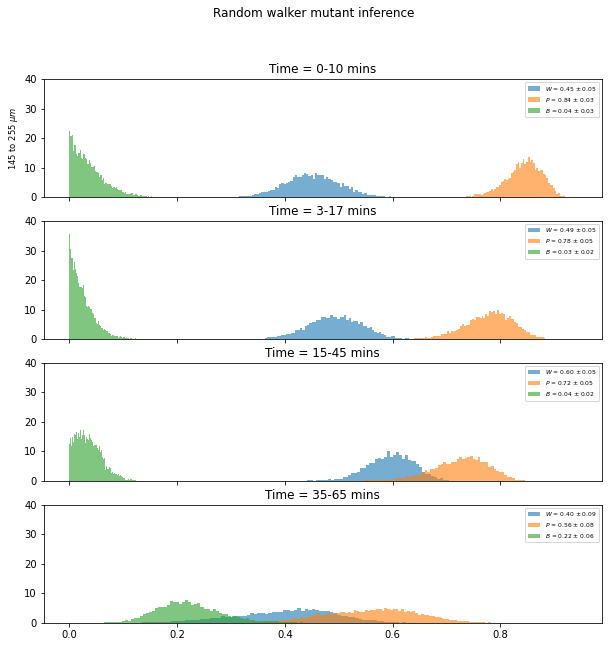

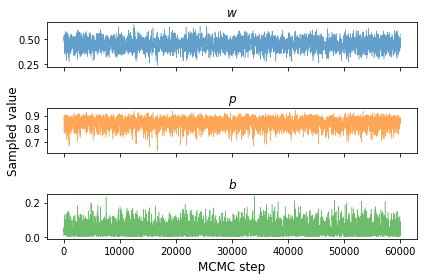

In [11]:
## Plot the posterior distribution for np.arrays
fig, ax = plt.subplots(4,figsize=(10,10),sharex=True,sharey=True)
fig.suptitle("Random walker mutant inference")

spatialbinindex = 0
for i in [spatialbinindex]:
    for j in [0,1,2,3]:
        data = loadData(i,j)

        W = data[:,0]
        P = data[:,1]
        B = data[:,2]

        ax[j].set_ylim([0, 40])
        ax[j].hist(W,label='$W$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(W), np.std(W)),bins=100,alpha=0.6,density=True)
        ax[j].hist(P,label='$P$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(P), np.std(P)),bins=100,alpha=0.6,density=True)
        ax[j].hist(B,label='$B$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(B), np.std(B)),bins=100,alpha=0.6,density=True)
        ax[j].set_title(Time[j])
        ax[0].set_ylabel(Space[7], rotation=90, size='small')

        ax[j].legend(prop={'size': 6})

## This outputs the trace for a specified np.array
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True)

for i in [0,1,2]:
    dist_out = loadData(spatialbinindex,0)
    axes[i].plot(dist_out[:, i], linewidth=0.5, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=0.7)
    axes[i].set_title(['$w$', '$p$', '$b$'][i])

axes[1].set_ylabel('Sampled value', size='large')
axes[2].set_xlabel('MCMC step', size='large')
plt.tight_layout()
